In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
results_tf = pd.read_csv("tf_models_results.csv")
results_st = pd.read_csv("sentence_transformers_models_results.csv")

In [3]:
def type_of_representation(row):
    type_of_representation = row.split("_")[1] + " labels"
    return type_of_representation

In [4]:
results_tf["type"] = results_tf["data_model"].apply(type_of_representation)
results_st["type"] = results_st["data_model"].apply(type_of_representation)

In [5]:
results_tf.replace({"determinants_individual":"individual determinant labels", 
                    "contents_individual":"individual content labels",
                    "determinants_macro":"macro determinant labels",
                    "contents_macro":"macro content labels"}, inplace=True)
results_st.replace({"determinants_individual":"individual determinant labels", 
                    "contents_individual":"individual content labels",
                    "determinants_macro":"macro determinant labels",
                    "contents_macro":"macro content labels"}, inplace=True)

# Results TF-IDF Models

In [6]:
results_tf.describe()

,accuracy,f1,hamming
count,24.000000,24.000000,24.000000
mean,0.173737,0.276882,0.107185
std,0.134890,0.179429,0.077909
min,0.000000,0.000000,0.038721
25%,0.070574,0.127778,0.060241
50%,0.155870,0.279434,0.075512
75%,0.286538,0.406043,0.118604
max,0.475000,0.626506,0.302564


In [7]:
results_tf.head()

,data_model,labels,ml_algo,accuracy,f1,hamming,type
0,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",KNeighborsClassifier,0.105263,0.133333,0.076023,individual labels
1,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...","LogisticRegression(random_state=42, solver='li...",0.026316,0.043478,0.064327,individual labels
2,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",SVC(random_state=42),0.026316,0.042553,0.065789,individual labels
3,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",RandomForestClassifier(random_state=42),0.078947,0.111111,0.070175,individual labels
4,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",SGDClassifier(random_state=42),0.157895,0.181818,0.078947,individual labels


In [8]:
results_tf.sort_values("f1", ascending=False)[:5]

,data_model,labels,ml_algo,accuracy,f1,hamming,type
16,macro content labels,"['animal_sum', 'human_sum', 'abs_sum', 'food_s...",SGDClassifier(random_state=42),0.450000,0.626506,0.070455,macro labels
12,macro content labels,"['animal_sum', 'human_sum', 'abs_sum', 'food_s...",KNeighborsClassifier,0.475000,0.582278,0.075000,macro labels
22,macro determinant labels,"['color_sum', 'threat_sum', 'fading_sum', 'for...",SGDClassifier(random_state=42),0.307692,0.494382,0.230769,macro labels
21,macro determinant labels,"['color_sum', 'threat_sum', 'fading_sum', 'for...",RandomForestClassifier(random_state=42),0.282051,0.457143,0.194872,macro labels
23,macro determinant labels,"['color_sum', 'threat_sum', 'fading_sum', 'for...",GradientBoostingClassifier(random_state=42),0.153846,0.432432,0.215385,macro labels


In [9]:
results_tf[results_tf["type"] == "macro labels"].describe()

,accuracy,f1,hamming
count,12.000000,12.000000,12.000000
mean,0.269124,0.407447,0.157765
std,0.119395,0.131844,0.082954
min,0.102564,0.148148,0.070455
25%,0.188462,0.361710,0.082955
50%,0.291026,0.406288,0.144027
75%,0.312019,0.466453,0.223077
max,0.475000,0.626506,0.302564


In [10]:
results_tf[results_tf["type"] == "individual labels"].describe()

,accuracy,f1,hamming
count,12.000000,12.000000,12.000000
mean,0.078349,0.146317,0.056604
std,0.062750,0.112871,0.015103
min,0.000000,0.000000,0.038721
25%,0.026316,0.066425,0.042088
50%,0.062201,0.122222,0.056154
75%,0.141746,0.196970,0.067982
max,0.159091,0.361111,0.078947


In [11]:
results_tf.pivot_table(["f1"], columns="data_model", index="ml_algo")

f1  \
data_model                                         individual content labels   
ml_algo                                                                        
GradientBoostingClassifier(random_state=42)                         0.361111   
KNeighborsClassifier                                                0.242424   
LogisticRegression(random_state=42, solver='lib...                  0.000000   
RandomForestClassifier(random_state=42)                             0.074074   
SGDClassifier(random_state=42)                                      0.313253   
SVC(random_state=42)                                                0.074074   

                                                                                  \
data_model                                         individual determinant labels   
ml_algo                                                                            
GradientBoostingClassifier(random_state=42)                             0.178571   
KNeighborsClassifier                                                    0.133333   
LogisticRegression(random_state=42, solver='lib...                      0.043478   
RandomForestClassifier(random_state=42)                                 0.111111   
SGDClassifier(random_state=42)                                          0.181818   
SVC(random_state=42)                                                    0.042553   

                                                                         \
data_model                                         macro content labels   
ml_algo                                                                   
GradientBoostingClassifier(random_state=42)                    0.375000   
KNeighborsClassifier                                           0.582278   
LogisticRegression(random_state=42, solver='lib...             0.406780   
RandomForestClassifier(random_state=42)                        0.405797   
SGDClassifier(random_state=42)                                 0.626506   
SVC(random_state=42)                                           0.393443   

                                                                             
data_model                                         macro determinant labels  
ml_algo                                                                      
GradientBoostingClassifier(random_state=42)                        0.432432  
KNeighborsClassifier                                               0.321839  
LogisticRegression(random_state=42, solver='lib...                 0.245614  
RandomForestClassifier(random_state=42)                            0.457143  
SGDClassifier(random_state=42)                                     0.494382  
SVC(random_state=42)                                               0.148148

In [12]:
results_tf.pivot_table(["f1"], columns="type", index="ml_algo")

f1  \
type                                               individual labels   
ml_algo                                                                
GradientBoostingClassifier(random_state=42)                 0.269841   
KNeighborsClassifier                                        0.187879   
LogisticRegression(random_state=42, solver='lib...          0.021739   
RandomForestClassifier(random_state=42)                     0.092593   
SGDClassifier(random_state=42)                              0.247536   
SVC(random_state=42)                                        0.058314   

                                                                 
type                                               macro labels  
ml_algo                                                          
GradientBoostingClassifier(random_state=42)            0.403716  
KNeighborsClassifier                                   0.452059  
LogisticRegression(random_state=42, solver='lib...     0.326197  
RandomForestClassifier(random_state=42)                0.431470  
SGDClassifier(random_state=42)                         0.560444  
SVC(random_state=42)                                   0.270795

In [13]:
results_tf[["type", "f1"]].groupby("type").mean()

,f1
type,
individual labels,0.146317
macro labels,0.407447


In [14]:
print(results_tf[["type", "f1"]].groupby("type").mean().to_latex())

\begin{tabular}{lr}
\toprule
 & f1 \\
type &  \\
\midrule
individual labels & 0.146317 \\
macro labels & 0.407447 \\
\bottomrule
\end{tabular}



In [15]:
results_tf[["type", "f1"]].groupby("type").std()

,f1
type,
individual labels,0.112871
macro labels,0.131844


In [16]:
results_tf[["data_model", "f1"]].groupby("data_model").mean()

,f1
data_model,
individual content labels,0.177489
individual determinant labels,0.115144
macro content labels,0.464967
macro determinant labels,0.349926


In [17]:
print(results_tf[["data_model", "f1"]].groupby("data_model").mean().to_latex())

\begin{tabular}{lr}
\toprule
 & f1 \\
data_model &  \\
\midrule
individual content labels & 0.177489 \\
individual determinant labels & 0.115144 \\
macro content labels & 0.464967 \\
macro determinant labels & 0.349926 \\
\bottomrule
\end{tabular}



In [18]:
results_tf[["data_model", "f1"]].groupby("data_model").std()

,f1
data_model,
individual content labels,0.147822
individual determinant labels,0.062002
macro content labels,0.109502
macro determinant labels,0.135318


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


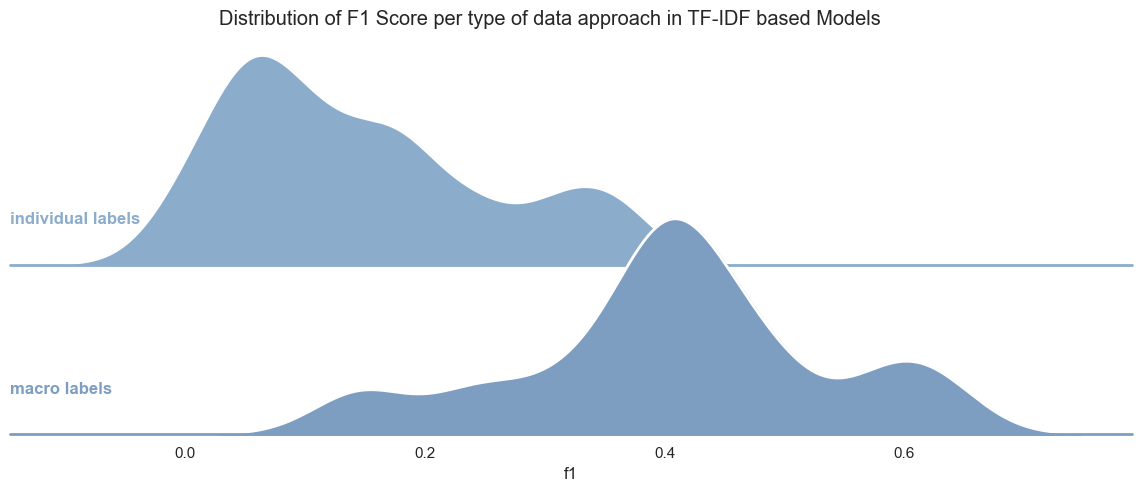

In [37]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.15, light=.65)
g = sns.FacetGrid(results_tf, row="type", hue="type", aspect=15, height=.5, palette=pal)


g.figure.set_figheight(5)
g.figure.set_figwidth(12)



g.map(sns.kdeplot, "f1",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "f1", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(f1, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "f1")

g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
# g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)
# g.set_xlabels("F1 Score")ç
# g.set_xlabels("")

plt.suptitle("Distribution of F1 Score per type of data approach in TF-IDF based Models")

plt.show()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


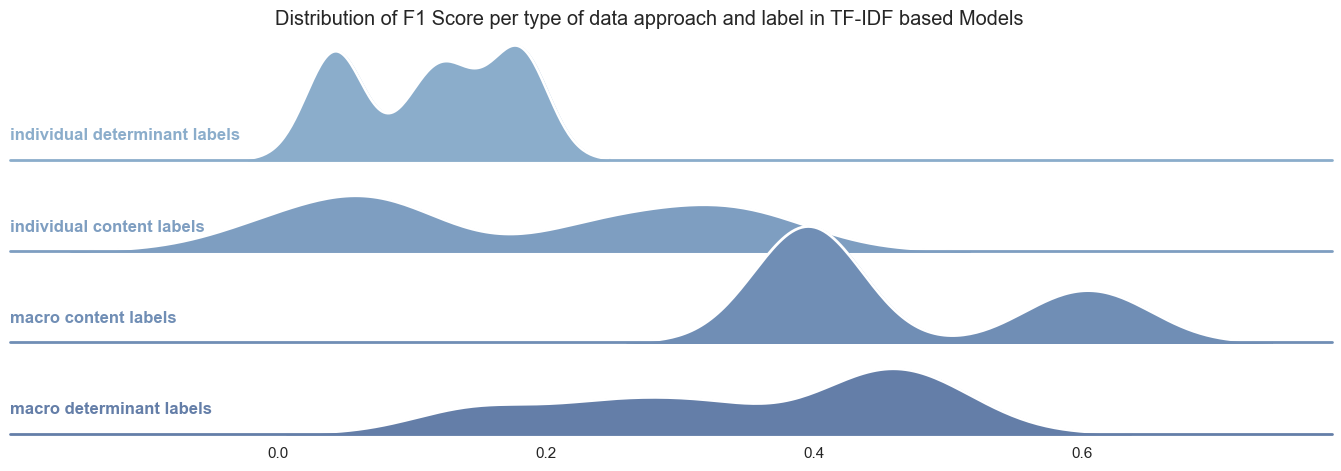

In [38]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.15, light=.65)
g = sns.FacetGrid(results_tf, row="data_model", hue="data_model", aspect=15, height=.5, palette=pal)


g.figure.set_figheight(5)
g.figure.set_figwidth(14)



g.map(sns.kdeplot, "f1",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "f1", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(f1, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "f1")

g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
# g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)
# g.set_xlabels("F1 Score")ç
g.set_xlabels("")

plt.suptitle("Distribution of F1 Score per type of data approach and label in TF-IDF based Models")

plt.show()

# Results Sentence Transformers Models

In [21]:
results_st.head()

,data_model,labels,ml_algo,accuracy,f1,hamming,type
0,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",KNeighborsClassifier,0.105263,0.142857,0.070175,individual labels
1,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...","LogisticRegression(random_state=42, solver='li...",0.000000,0.000000,0.064327,individual labels
2,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",SVC(random_state=42),0.000000,0.000000,0.065789,individual labels
3,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",RandomForestClassifier(random_state=42),0.210526,0.193548,0.109649,individual labels
4,individual determinant labels,"['C', ""C'"", ""C'F"", 'CF', ""CF'"", 'CLOB', 'CLOBF...",SGDClassifier(random_state=42),0.000000,0.000000,0.064327,individual labels


In [22]:
results_st.sort_values("f1", ascending=False)[:5]

,data_model,labels,ml_algo,accuracy,f1,hamming,type
21,macro determinant labels,"['color_sum', 'threat_sum', 'fading_sum', 'for...",RandomForestClassifier(random_state=42),0.297297,0.412371,0.308108,macro labels
18,macro determinant labels,"['color_sum', 'threat_sum', 'fading_sum', 'for...",KNeighborsClassifier,0.297297,0.400000,0.243243,macro labels
17,macro content labels,"['animal_sum', 'human_sum', 'abs_sum', 'food_s...",GradientBoostingClassifier(random_state=42),0.250000,0.380952,0.118182,macro labels
15,macro content labels,"['animal_sum', 'human_sum', 'abs_sum', 'food_s...",RandomForestClassifier(random_state=42),0.250000,0.375000,0.136364,macro labels
23,macro determinant labels,"['color_sum', 'threat_sum', 'fading_sum', 'for...",GradientBoostingClassifier(random_state=42),0.270270,0.370370,0.275676,macro labels


In [23]:
results_st.describe()

,accuracy,f1,hamming
count,24.000000,24.000000,24.000000
mean,0.108740,0.145187,0.127906
std,0.119376,0.161633,0.084076
min,0.000000,0.000000,0.044789
25%,0.000000,0.000000,0.065424
50%,0.064259,0.093750,0.106818
75%,0.220395,0.306159,0.163084
max,0.297297,0.412371,0.308108


In [24]:
results_st[results_st["type"] == "macro labels"].describe()

,accuracy,f1,hamming
count,12.000000,12.000000,12.000000
mean,0.153322,0.213860,0.189036
std,0.137626,0.191065,0.078660
min,0.000000,0.000000,0.106818
25%,0.000000,0.000000,0.115341
50%,0.225000,0.313811,0.189803
75%,0.271453,0.376488,0.248649
max,0.297297,0.412371,0.308108


In [25]:
results_st[results_st["type"] == "individual labels"].describe()

,accuracy,f1,hamming
count,12.000000,12.000000,12.000000
mean,0.064157,0.076514,0.066777
std,0.080742,0.088487,0.020969
min,0.000000,0.000000,0.044789
25%,0.000000,0.000000,0.049957
50%,0.011628,0.031250,0.065058
75%,0.113831,0.150154,0.070719
max,0.210526,0.222222,0.109649


In [26]:
results_st.pivot_table(["f1"], columns="data_model", index="ml_algo")

f1  \
data_model                                         individual content labels   
ml_algo                                                                        
GradientBoostingClassifier(random_state=42)                         0.172043   
KNeighborsClassifier                                                0.062500   
LogisticRegression(random_state=42, solver='lib...                  0.000000   
RandomForestClassifier(random_state=42)                             0.222222   
SGDClassifier(random_state=42)                                      0.000000   
SVC(random_state=42)                                                0.000000   

                                                                                  \
data_model                                         individual determinant labels   
ml_algo                                                                            
GradientBoostingClassifier(random_state=42)                             0.125000   
KNeighborsClassifier                                                    0.142857   
LogisticRegression(random_state=42, solver='lib...                      0.000000   
RandomForestClassifier(random_state=42)                                 0.193548   
SGDClassifier(random_state=42)                                          0.000000   
SVC(random_state=42)                                                    0.000000   

                                                                         \
data_model                                         macro content labels   
ml_algo                                                                   
GradientBoostingClassifier(random_state=42)                    0.380952   
KNeighborsClassifier                                           0.329114   
LogisticRegression(random_state=42, solver='lib...             0.000000   
RandomForestClassifier(random_state=42)                        0.375000   
SGDClassifier(random_state=42)                                 0.000000   
SVC(random_state=42)                                           0.298507   

                                                                             
data_model                                         macro determinant labels  
ml_algo                                                                      
GradientBoostingClassifier(random_state=42)                        0.370370  
KNeighborsClassifier                                               0.400000  
LogisticRegression(random_state=42, solver='lib...                 0.000000  
RandomForestClassifier(random_state=42)                            0.412371  
SGDClassifier(random_state=42)                                     0.000000  
SVC(random_state=42)                                               0.000000

In [27]:
results_st.pivot_table(["f1"], columns="type", index="ml_algo")

f1  \
type                                               individual labels   
ml_algo                                                                
GradientBoostingClassifier(random_state=42)                 0.148522   
KNeighborsClassifier                                        0.102679   
LogisticRegression(random_state=42, solver='lib...          0.000000   
RandomForestClassifier(random_state=42)                     0.207885   
SGDClassifier(random_state=42)                              0.000000   
SVC(random_state=42)                                        0.000000   

                                                                 
type                                               macro labels  
ml_algo                                                          
GradientBoostingClassifier(random_state=42)            0.375661  
KNeighborsClassifier                                   0.364557  
LogisticRegression(random_state=42, solver='lib...     0.000000  
RandomForestClassifier(random_state=42)                0.393686  
SGDClassifier(random_state=42)                         0.000000  
SVC(random_state=42)                                   0.149254

In [28]:
results_st[["type", "f1"]].groupby("type").mean()

,f1
type,
individual labels,0.076514
macro labels,0.213860


In [29]:
print(results_st[["type", "f1"]].groupby("type").mean().to_latex())

\begin{tabular}{lr}
\toprule
 & f1 \\
type &  \\
\midrule
individual labels & 0.076514 \\
macro labels & 0.213860 \\
\bottomrule
\end{tabular}



In [30]:
results_st[["type", "f1"]].groupby("type").std()

,f1
type,
individual labels,0.088487
macro labels,0.191065


In [31]:
results_st[["data_model", "f1"]].groupby("data_model").mean()

,f1
data_model,
individual content labels,0.076128
individual determinant labels,0.076901
macro content labels,0.230596
macro determinant labels,0.197124


In [32]:
print(results_st[["data_model", "f1"]].groupby("data_model").mean().to_latex())

\begin{tabular}{lr}
\toprule
 & f1 \\
data_model &  \\
\midrule
individual content labels & 0.076128 \\
individual determinant labels & 0.076901 \\
macro content labels & 0.230596 \\
macro determinant labels & 0.197124 \\
\bottomrule
\end{tabular}



In [33]:
results_st[["data_model", "f1"]].groupby("data_model").std()

,f1
data_model,
individual content labels,0.098097
individual determinant labels,0.087191
macro content labels,0.181177
macro determinant labels,0.216369


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


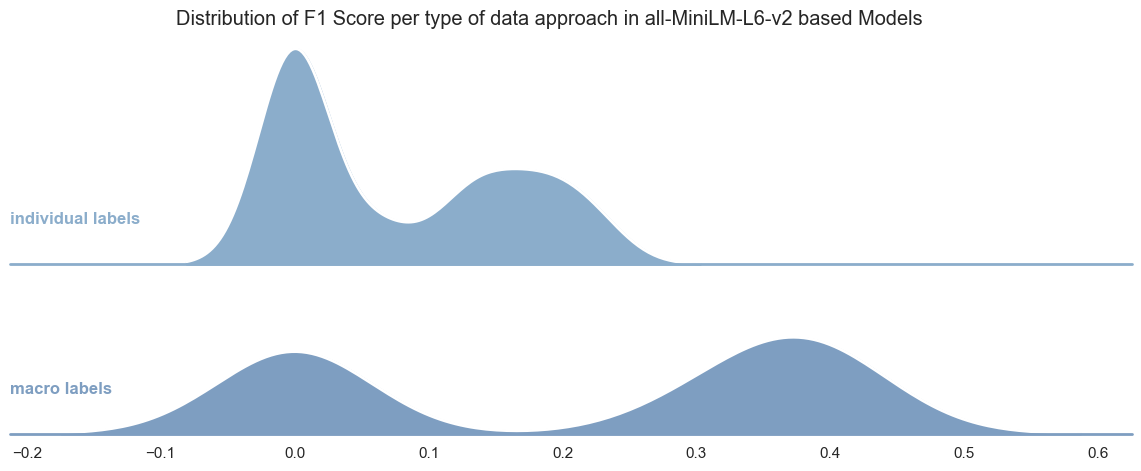

In [39]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.15, light=.65)
g = sns.FacetGrid(results_st, row="type", hue="type", aspect=15, height=.5, palette=pal)


g.figure.set_figheight(5)
g.figure.set_figwidth(12)



g.map(sns.kdeplot, "f1",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "f1", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(f1, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "f1")

g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
# g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)

# g.set_xlabels("F1 Score")ç
g.set_xlabels("")
plt.suptitle("Distribution of F1 Score per type of data approach in all-MiniLM-L6-v2 based Models")

plt.show()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


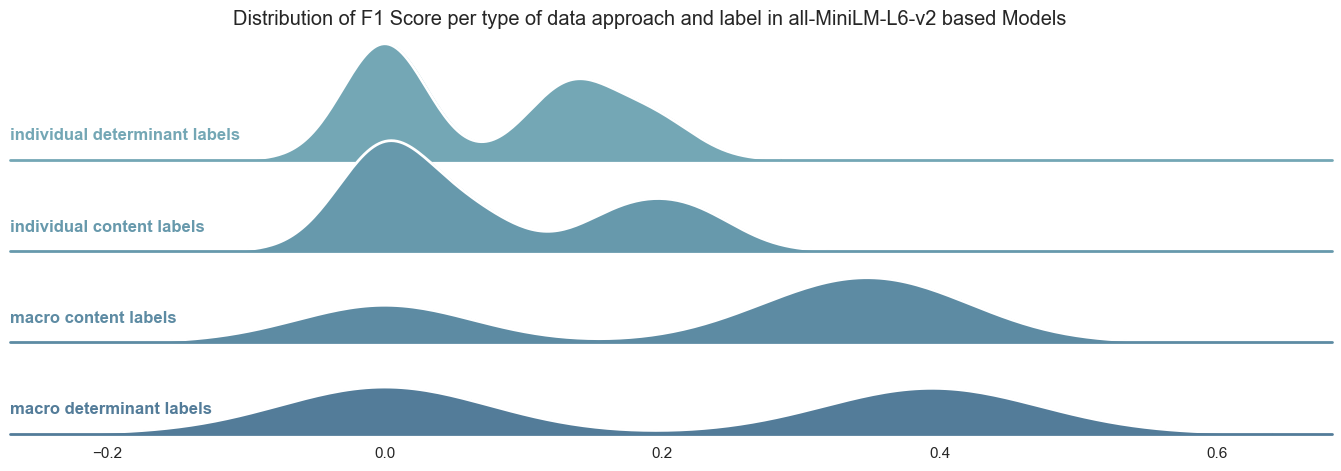

In [40]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.6)
g = sns.FacetGrid(results_st, row="data_model", hue="data_model", aspect=15, height=.5, palette=pal)


g.figure.set_figheight(5)
g.figure.set_figwidth(14)



g.map(sns.kdeplot, "f1",
      bw_adjust=.5, clip_on=True,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "f1", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(f1, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "f1")

g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
# g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)

# g.set_xlabels("F1 Score")ç
g.set_xlabels("")

plt.suptitle("Distribution of F1 Score per type of data approach and label in all-MiniLM-L6-v2 based Models")

plt.show()